# Gaussian Fit for 2-Dimensional Spectra and Spatial Fitting | Version 0.1


In [4]:
cd /orange/adamginsburg/w51/vla/19A-254/derod/

/orange/adamginsburg/w51/vla/19A-254/derod


# Work 1

In [2]:
import astropy
import numpy as np
from spectral_cube import SpectralCube
from astropy import units as u
#Import data

cube = SpectralCube.read('W51North_spw_28.image', format=''casa_image'')

cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio', rest_value= 25.715141 * u.GHz)
x, y = 504, 484
cube = cube[:,x,y]

x_mean = cube.mean(axis=-1)
y_mean = cube.mean(axis=0)

x_stddev = cube.mad_std(axis=-1)
y_stddev = cube.mad_std(axis=0)

#Pixel location (x,y)

print(cube.mean(axis=0))
print(cube.mean(axis=-1))

def gaussian2D(xvals,yvals,x,y,x_mean,y_mean,A):
    return A*exp(-(((xvals-x)^2)/(2*x_mean^2)) + (((yvals-y)^2)/(2*y_mean^2)))

import pylab as pl


#pl.plot(xval, gaussian(xval, a_77_2, FWHM_77_2, rest_77_2),color='blue')

AttributeError: 'VaryingResolutionOneDSpectrum' object has no 'mad_std' member

In [3]:
import astropy
from spectral_cube import SpectralCube
from astropy import units as u
#Import data

cube = SpectralCube.read('W51North_spw_28.image', format='casa_image')

cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio', rest_value= 25.715141 * u.GHz)

x_mean = 0
y_mean = 0

x_stddev = 0
y_stddev = 0

#astropy.modeling.functional_models.Gaussian2D(0.49,)

#Pixel location (x,y)
x, y = 504, 484

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_28_corrected15.image")
cube = SpectralCube.read("sample18.fits")

print(cube)
cube.beam_threshold=1
moment0 = cube.moment0(axis=0)

moment0.quicklook(use_aplpy=True)

x, y = 3227, 5226
size = 250

moment0_cutout = moment0[y-size:y+size, x-size:x+size]
moment0_cutout.quicklook(use_aplpy=True)

# Define the spatial grid for the fit centered at y, x = 145, 342
yy, xx = moment0_cutout.spatial_coordinate_map

# Define a single 2D Gaussian model.
p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=0.6, x_stddev=0.000001 * u.arcsec, y_stddev=0.00001 * u.arcsec)

# And fit with the Levenberg-Marquardt algorithm and least squares statistic.
fit_p = fitting.LevMarLSQFitter()

#moment0_cutout_quant = moment0_cutout.quantity
moment0_cutout_quant = moment0_cutout.value
moment0_cutout_quant[np.isnan(moment0_cutout_quant)] = 0.0

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, moment0_cutout_quant)
    
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(moment0_cutout.value, origin='lower', cmap='viridis')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='viridis')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(moment0_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='viridis')
plt.colorbar()

plt.tight_layout()

plt.show()

SpectralCube with shape=(1, 9600, 9600) and unit=Jy / beam:
 n_x:   9600  type_x: RA---SIN  unit_x: deg    range:   290.916161 deg:  290.917539 deg
 n_y:   9600  type_y: DEC--SIN  unit_y: deg    range:    14.517506 deg:   14.518839 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz


In [ ]:
plt.imshow(cube[:,70:95,40:60].max(axis=0).value)

In [2]:
plt.imshow(cube[:,:,:].max(axis=0).value)

NameError: name 'plt' is not defined

# Work 2

In [ ]:
import numpy

xvals =
yvals =
x     =
y     = 
x_mean=
y_mean=

def gaussian2D(xvals,yvals,x,y,x_mean,y_mean,A):
    return A*exp(-(((xvals-x)^2)/(2*x_mean^2)) + (((yvals-y)^2)/(2*y_mean^2)))





Text(0.5, 1.0, 'Residual')

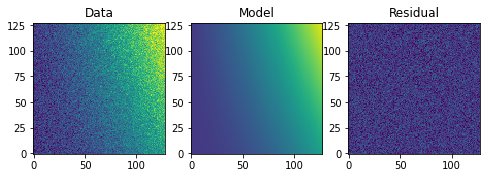

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Generate fake data
np.random.seed(0)
y, x = np.mgrid[:128, :128]
z = 2. * x ** 2 - 0.5 * x ** 2 + 1.5 * x * y - 1.
z += np.random.normal(0., 0.1, z.shape) * 50000.

# Fit the data using astropy.modeling
p_init = models.Polynomial2D(degree=2)
fit_p = fitting.LevMarLSQFitter()

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p = fit_p(p_init, x, y, z)

# Plot the data with the best-fit model
plt.figure(figsize=(8, 2.5))
plt.subplot(1, 3, 1)
plt.imshow(z, origin='lower', interpolation='nearest', vmin=-1e4, vmax=5e4)
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(p(x, y), origin='lower', interpolation='nearest', vmin=-1e4,
           vmax=5e4)
plt.title("Model")
plt.subplot(1, 3, 3)
plt.imshow(z - p(x, y), origin='lower', interpolation='nearest', vmin=-1e4,
           vmax=5e4)
plt.title("Residual")

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_28_corrected15.image")
cube = SpectralCube.read("sample18.fits")

print(cube)
cube.beam_threshold=1
moment0 = cube.moment0(axis=0)

moment0.quicklook(use_aplpy=True)

x, y = 3227, 5226
size = 250

moment0_cutout = moment0[y-size:y+size, x-size:x+size]
moment0_cutout.quicklook(use_aplpy=True)

# Define the spatial grid for the fit centered at y, x = 145, 342
yy, xx = moment0_cutout.spatial_coordinate_map

# Define a single 2D Gaussian model.
p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=0.6, x_stddev=0.00001 * u.arcsec, y_stddev=0.00001 * u.arcsec)


# And fit with the Levenberg-Marquardt algorithm and least squares statistic.
fit_p = fitting.LevMarLSQFitter()

# NEEDS TO BE FIXED. should be able to use with_fill_value for projections
# fill value is NOT working for Projection
# mom0_sub.with_fill_value(fill_value=0.0).filled_data[:]

#moment0_cutout_quant = moment0_cutout.quantity
moment0_cutout_quant = moment0_cutout.value
moment0_cutout_quant[np.isnan(moment0_cutout_quant)] = 0.0

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, moment0_cutout_quant)
    


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(moment0_cutout.value, origin='lower', cmap='viridis')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='viridis')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(moment0_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='viridis')
plt.colorbar()

plt.tight_layout()

plt.show()

SpectralCube with shape=(1, 9600, 9600) and unit=Jy / beam:
 n_x:   9600  type_x: RA---SIN  unit_x: deg    range:   290.916161 deg:  290.917539 deg
 n_y:   9600  type_y: DEC--SIN  unit_y: deg    range:    14.517506 deg:   14.518839 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz


In [51]:
x = np.linspace(0, 1116, 1117)
y = np.linspace(0, 843, 844)
x, y = np.meshgrid(x, y)
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = xdata_tuple                                                        
    xo = float(xo)                                                              
    yo = float(yo)                                                              
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)   
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)    
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)   
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))                                   
    return g.ravel()
data = LightStackCal.ravel() # Flatten the data
initial_guess = (0.01,450,420,-50,-100,3,0) 
popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), data, p0=initial_guess)

NameError: name 'LightStackCal' is not defined

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_28_corrected15.image")
cube = SpectralCube.read("sample18.fits")

print(cube)
cube.beam_threshold=0.5
moment0 = cube.moment0(axis=0)

x, y = 3227, 5226
size = 250

moment0_cutout = moment0[y-size:y+size, x-size:x+size]
moment0_cutout.quicklook(use_aplpy=True)

yy, xx = moment0_cutout.spatial_coordinate_map

test_fixed = models.Sersic2D(x_0=3227, y_0=5226, theta=1)
fit_p = fitting.LevMarLSQFitter()

moment0_cutout_quant = moment0_cutout.value
moment0_cutout_quant[np.isnan(moment0_cutout_quant)] = 0.0

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(test_fixed, xx, yy, moment0_cutout_quant)
    


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(moment0_cutout.value, origin='lower', cmap='viridis')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='viridis')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(moment0_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='viridis')
plt.colorbar()

plt.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'sample18.fits'

In [67]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

cube = SpectralCube.read("sample18.fits")

print(np.std(cube[:]))

0.013144233264029026 Jy / beam


In [1]:
'''Reference 
Fitting with spectral-cube and astropy

Eric Koch
'''

import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

cube = SpectralCube.read("sample18.fits")
cord = cube.world[:,y,x]
print(cord)

    
cube.beam_threshold=0.5
moment0 = cube.moment0(axis=0)
#maser_channel = 579


x, y = 3227, 5226
size = 1000

moment0_cutout = moment0[y-size:y+size, x-size:x+size]
moment0_cutout.quicklook(use_aplpy=True)

yy, xx = moment0_cutout.spatial_coordinate_map

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=10000, x_stddev=0.02 * u.arcsec, y_stddev=0.02 * u.arcsec)

fit_p = fitting.LevMarLSQFitter()

moment0_cutout_quant = moment0_cutout.value
moment0_cutout_quant[np.isnan(moment0_cutout_quant)] = 0.0

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, moment0_cutout_quant)

    
print(np.std(cube[:]))
print(p_gauss2D)

plt.figure(figsize=(18, 6))
plt.title("W51North NH3 (7,7)")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(moment0_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(moment0_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'sample18.fits'

In [29]:
x = np.linspace(0, 1116, 1117)
y = np.linspace(0, 843, 844)
x, y = np.meshgrid(x, y)
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = xdata_tuple                                                        
    xo = float(xo)                                                              
    yo = float(yo)                                                              
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)   
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)    
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)   
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))                                   
    return g.ravel()
data = LightStackCal.ravel() # Flatten the data
initial_guess = (0.01,450,420,-50,-100,3,0) 
popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), data, p0=initial_guess)

NameError: name 'LightStackCal' is not defined

[<Quantity [2.57110882e+10] Hz>, <Quantity [14.51823139] deg>, <Quantity [290.91707568] deg>]


0.013144233264029026 Jy / beam
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
       amplitude           x_mean      ...        y_stddev       theta
                            deg        ...          deg           rad 
    ---------------- ----------------- ... --------------------- -----
    8485.89549563739 290.9170757495808 ... 7.000625133350534e-06   0.0


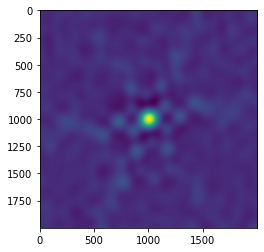

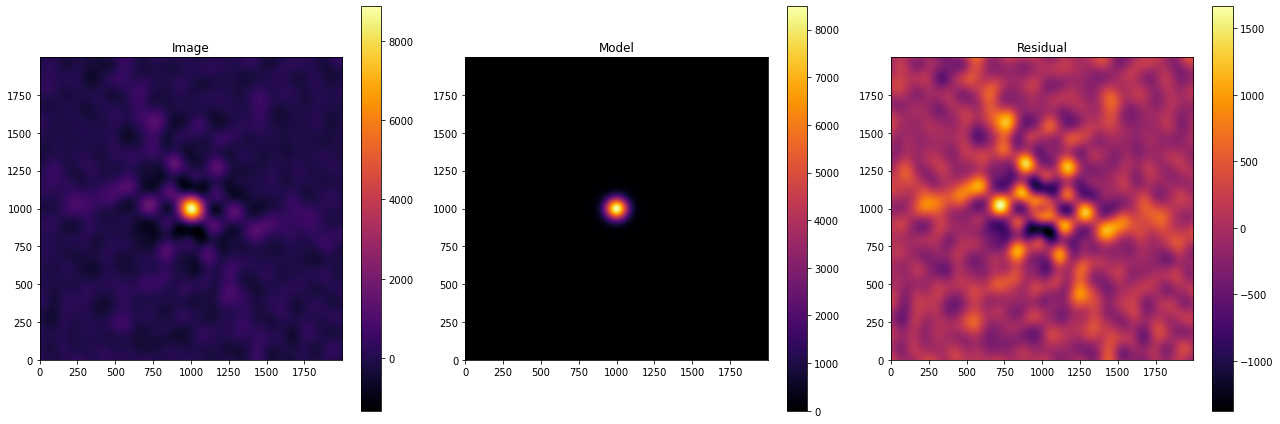

In [85]:
'''Reference 
Fitting with spectral-cube and astropy

Eric Koch
'''

import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

cube = SpectralCube.read("sample18.fits")
cord = cube.world[:,y,x]
print(cord)

    
cube.beam_threshold=0.5
moment0 = cube.moment0(axis=0)
#maser_channel = 579


x, y = 3227, 5226
size = 1000

moment0_cutout = moment0[y-size:y+size, x-size:x+size]
moment0_cutout.quicklook(use_aplpy=True)

yy, xx = moment0_cutout.spatial_coordinate_map

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=10000, x_stddev=0.02 * u.arcsec, y_stddev=0.02 * u.arcsec)

fit_p = fitting.LevMarLSQFitter()

moment0_cutout_quant = moment0_cutout.value
moment0_cutout_quant[np.isnan(moment0_cutout_quant)] = 0.0

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, moment0_cutout_quant)

    
print(np.std(cube[:]))
print(p_gauss2D)

plt.figure(figsize=(18, 6))
plt.title("W51North NH3 (7,7)")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(moment0_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(moment0_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.tight_layout()

plt.show()

In [ ]:
'''Reference 
Fitting with spectral-cube and astropy

Eric Koch
'''

import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

cube = SpectralCube.read("sample18.fits")

    
cube.beam_threshold=0.5
moment0 = cube.moment0(axis=0)
#maser_channel = 579


x, y = 3227, 5226
size = 1000

moment0_cutout = moment0[y-size:y+size, x-size:x+size]
moment0_cutout.quicklook(use_aplpy=True)

yy, xx = moment0_cutout.spatial_coordinate_map

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=10000, x_stddev=0.02 * u.arcsec, y_stddev=0.02 * u.arcsec)

fit_p = fitting.LevMarLSQFitter()

moment0_cutout_quant = moment0_cutout.value
moment0_cutout_quant[np.isnan(moment0_cutout_quant)] = 0.0

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, moment0_cutout_quant)

cord = cube.world[:,y,x]
print(cord)
print(np.std(cube[:]))
print(p_gauss2D)

## May 25, 2021
Changed Hz Jy / beam to Jy/beam by writing the code to fit cube gaussian models and not moment0 gaussian models. After I enter the correct units for right ascension and declination in WCS, I will begin recording the parameters for each maser observed.


In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/sample18.fits")
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 3227, 5226
size = 1000


p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=10000 * (u.Jy/u.beam),
                                   x_stddev=0.02 * u.arcsec, y_stddev=0.02 * u.arcsec)
print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube.spatial_coordinate_map
print(yy,xx)

fit_p = fitting.LevMarLSQFitter()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube[0,:,:])

print(p_gauss2D)


plt.figure(figsize=(18, 6))
plt.title("W51North NH3 (7,7)")

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar("Brightness (Jy)")
plt.xlabel("x Location (degrees)")
plt.ylabel("y Location (degrees)")

plt.tight_layout()

plt.show()


<bound method BaseSpectralCube.max of SpectralCube with shape=(1, 9600, 9600) and unit=Jy / beam:
 n_x:   9600  type_x: RA---SIN  unit_x: deg    range:   290.916161 deg:  290.917539 deg
 n_y:   9600  type_y: DEC--SIN  unit_y: deg    range:    14.517506 deg:   14.518839 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz> Cube Max)
Jy / beam Unit Flux
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean            y_mean       x_stddev y_stddev theta
    Jy / beam        deg               deg          arcsec   arcsec       
    --------- ----------------- ------------------ -------- -------- -----
      10000.0 290.9170756769094 14.518231385948818     0.02     0.02   0.0 Printed models.Gaussian2D


## May 26

Added gaussian parameters over the model plot; changed the moment0 map with cube.max 2D map, which allows for amplitude gaussian modeling in Jy/beam

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/sample18.fits")
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 3227, 5226
size = 250

cube1 = cube[0,:,:]

max_2d_cube = cube.max(axis=0)
cube_cutout = max_2d_cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=10000 * (u.Jy/u.beam),
                                   x_stddev=0.02 * u.arcsec, y_stddev=0.02 * u.arcsec)

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()

cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

print(p_gauss2D)

plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7)")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.tight_layout()

plt.show()


<bound method BaseSpectralCube.max of SpectralCube with shape=(1, 9600, 9600) and unit=Jy / beam:
 n_x:   9600  type_x: RA---SIN  unit_x: deg    range:   290.916161 deg:  290.917539 deg
 n_y:   9600  type_y: DEC--SIN  unit_y: deg    range:    14.517506 deg:   14.518839 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz> Cube Max)
Jy / beam Unit Flux


<bound method BaseSpectralCube.max of SpectralCube with shape=(1, 9600, 9600) and unit=Jy / beam:
 n_x:   9600  type_x: RA---SIN  unit_x: deg    range:   290.916161 deg:  290.917539 deg
 n_y:   9600  type_y: DEC--SIN  unit_y: deg    range:    14.517506 deg:   14.518839 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz> Cube Max)
Jy / beam Unit Flux


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean            y_mean       x_stddev y_stddev theta
    Jy / beam        deg               deg          arcsec   arcsec       
    --------- ----------------- ------------------ -------- -------- -----
      10000.0 290.9170756769094 14.518231385948818     0.02     0.02   0.0 Printed models.Gaussian2D
Parameter('amplitude', value=0.5431198173027951, unit=Jy / beam)
Parameter('x_mean', value=290.91707567691407, unit=deg)
Parameter('y_mean', value=14.51823138594268, unit=deg)
Parameter('x_stddev', value=5.555684023863898e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Parameter('y_stddev', value=5.555648043839625e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean       ...        y_stddev       theta
        Jy / beam             deg         ...          deg

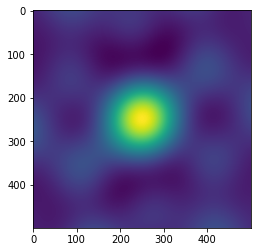

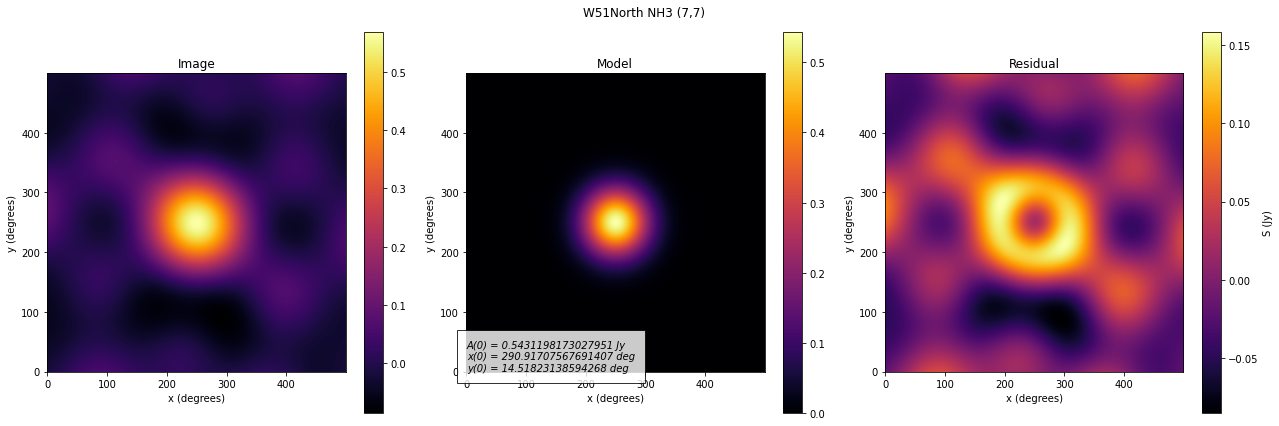

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/sample18.fits")
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 3227, 5226
size = 250

cube1 = cube[0,:,:]

max_2d_cube = cube.max(axis=0)
cube_cutout = max_2d_cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=10000 * (u.Jy/u.beam),
                                   x_stddev=0.02 * u.arcsec, y_stddev=0.02 * u.arcsec)

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()

cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)

plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7)")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.text(1, 1, "A(0) = "+str(p_gauss2D.amplitude[0])+" Jy\n"+"x(0) = "+str(p_gauss2D.x_mean[0])+
        " deg\n"+"y(0) = "+str(p_gauss2D.y_mean[0])+ " deg", style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10},horizontalalignment='left')
plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.tight_layout()
plt.show()

<bound method BaseSpectralCube.max of SpectralCube with shape=(1, 9600, 9600) and unit=Jy / beam:
 n_x:   9600  type_x: RA---SIN  unit_x: deg    range:   290.916161 deg:  290.917539 deg
 n_y:   9600  type_y: DEC--SIN  unit_y: deg    range:    14.517506 deg:   14.518839 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz> Cube Max)
Jy / beam Unit Flux


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean            y_mean       x_stddev y_stddev theta
    Jy / beam        deg               deg          arcsec   arcsec       
    --------- ----------------- ------------------ -------- -------- -----
      10000.0 290.9170756769094 14.518231385948818     0.02     0.02   0.0 Printed models.Gaussian2D
Parameter('amplitude', value=0.5431198173027951, unit=Jy / beam)
Parameter('x_mean', value=290.91707567691407, unit=deg)
Parameter('y_mean', value=14.51823138594268, unit=deg)
Parameter('x_stddev', value=5.555684023863898e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Parameter('y_stddev', value=5.555648043839625e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean       ...        y_stddev       theta
        Jy / beam             deg         ...          deg

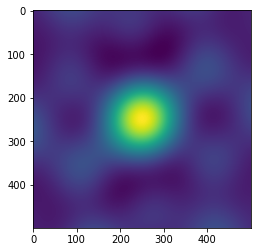

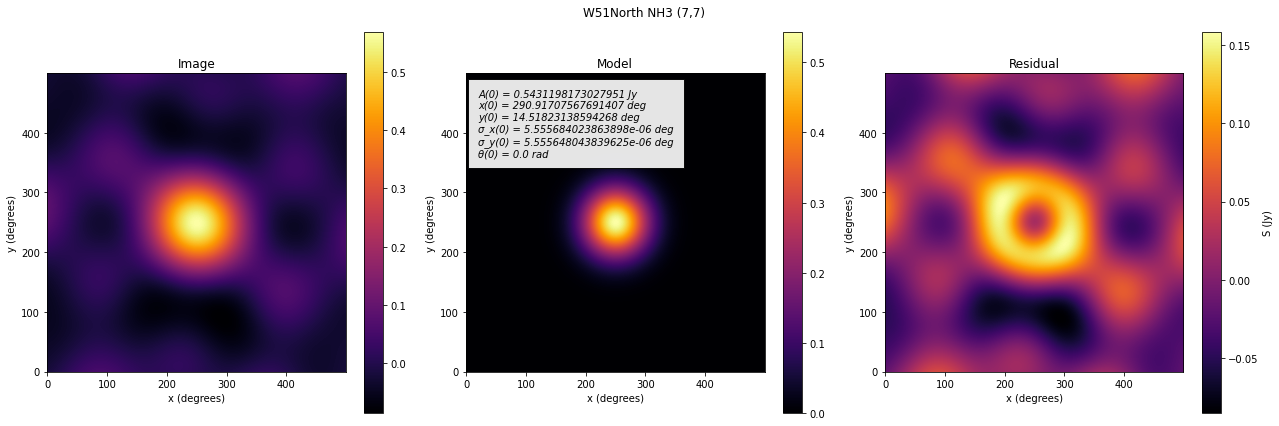

In [3]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/sample18.fits")
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 3227, 5226
size = 250

cube1 = cube[0,:,:]

max_2d_cube = cube.max(axis=0)
cube_cutout = max_2d_cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=10000 * (u.Jy/u.beam),
                                   x_stddev=0.02 * u.arcsec, y_stddev=0.02 * u.arcsec)

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()

cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)

plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7)")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.text(20, 360, "A(0) = "+str(p_gauss2D.amplitude[0])+" Jy\n"+"x(0) = "+str(p_gauss2D.x_mean[0])+
        " deg\n"+"y(0) = "+str(p_gauss2D.y_mean[0])+ " deg\n" + "σ_x(0) = "+str(p_gauss2D.x_stddev[0])+
        " deg\n"+"σ_y(0) = "+str(p_gauss2D.y_stddev[0])+" deg\n" +"θ(0) = "+str(p_gauss2D.theta[0])+" rad",
        style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10},
        horizontalalignment='left')
plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.tight_layout()
plt.show()

/home/dealderod/.local/lib/python3.8/site-packages/spectral_cube/lower_dimensional_structures.py:460: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  self.image = pyplot.imshow(self.value)
/home/dealderod/.local/lib/python3.8/site-packages/spectral_cube/lower_dimensional_structures.py:460: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  self.image = pyplot.imshow(self.value)


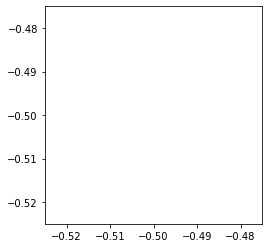

In [18]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_28.image", format='casa_image')

v_cube = cube.with_spectral_unit(u.km/u.s,
                                       velocity_convention='radio',
                                       rest_value=25.715141*u.GHz)
vel_cube = v_cube.spectral_slab(-25511.9442*u.km/u.s,-25518.4678*u.km/u.s)
cube.beam_threshold = 0.5

x, y = 3227, 5226
size = 250

max_2d_cube = vel_cube.max(axis=0)
cube_cutout = max_2d_cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

# sigma_map = vel_cube.linewidth_sigma()
# sigma_map_cutout = sigma_map[y - size:y + size, x - size:x + size]
# sigma_map_cutout.quicklook()

# maser_channel = 579


#
# moment_0 = vel_cube.moment(order=0)
# moment_0_cutout = moment_0[y - size:y + size, x - size:x + size]
# moment_0_cutout.quicklook()
#
# moment_1 = vel_cube.moment(order=1)
# moment_1_cutout = moment_1[y - size:y + size, x - size:x + size]
# moment_1_cutout.quicklook()
#
# moment_2 = vel_cube.moment(order=2)
# moment_2_cutout = moment_2[y - size:y + size, x - size:x + size]
# moment_2_cutout.quicklook()

# plt.figure(figsize=(18, 6))
# plt.suptitle("Moment Map Comparison")
#
# plt.subplot(1, 4, 1)
# plt.title("cube.max")
# plt.imshow(cube_cutout)
#
# plt.subplot(1, 4, 2)
# plt.title("moment0")
# plt.imshow(moment_0_cutout)
#
# plt.subplot(1, 4, 3)
# plt.title("moment1")
# plt.imshow(moment_1_cutout)
#
# plt.subplot(1, 4, 4)
# plt.title("moment2")
# plt.imshow(moment_2_cutout)
#
# plt.tight_layout()
# plt.show()


# p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg,
#                                    amplitude=10000 * (u.Jy/u.beam),
#                                    x_stddev=0.02 * u.arcsec, y_stddev=0.02 * u.arcsec)
#
# print(p_init_gauss2D,"Printed models.Gaussian2D")
#
# yy, xx = cube_cutout.spatial_coordinate_map
#
# fit_p = fitting.LevMarLSQFitter()
#
# cube_cutout_quant = cube_cutout
# cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0
#
# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
#
# print(p_gauss2D.amplitude)
# print(p_gauss2D.x_mean)
# print(p_gauss2D.y_mean)
# print(p_gauss2D.x_stddev)
# print(p_gauss2D.y_stddev)
#
# print(p_gauss2D)
#
# plt.figure(figsize=(18, 6))
# plt.suptitle("W51North NH3 (7,7)")
# plt.subplot(1, 3, 1)
# plt.title("Image")
# plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
# plt.colorbar()
# plt.xlabel("x (degrees)")
# plt.ylabel("y (degrees)")
# plt.subplot(1, 3, 2)
# plt.title("Model")
# plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
# plt.colorbar()
# plt.xlabel("x (degrees)")
# plt.ylabel("y (degrees)")
# plt.text(20, 360, "A(0) = "+str(p_gauss2D.amplitude[0])+" Jy\n"+"x(0) = "+str(p_gauss2D.x_mean[0])+
#         " deg\n"+"y(0) = "+str(p_gauss2D.y_mean[0])+ " deg\n" + "σ_x(0) = "+str(p_gauss2D.x_stddev[0])+
#         " deg\n"+"σ_y(0) = "+str(p_gauss2D.y_stddev[0])+" deg\n" +"θ(0) = "+str(p_gauss2D.theta[0])+" rad",
#         style='italic',
#         bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10},
#         horizontalalignment='left')
# plt.subplot(1, 3, 3)
# plt.title("Residual")
# plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
# plt.colorbar(label='S (Jy)')
# plt.xlabel("x (degrees)")
# plt.ylabel("y (degrees)")
# plt.tight_layout()
# plt.show()

25711088245.19 Hz


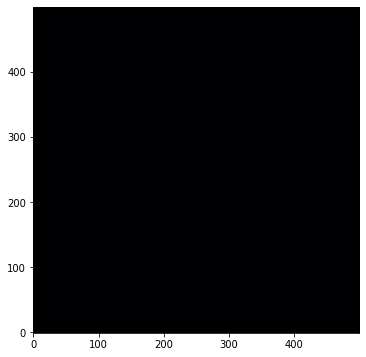

In [7]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/sample18.fits")

x, y = 3227, 5226
size = 250

moment_1 = cube.moment(order=1)

moment_1_cutout = moment_1[y - size:y + size, x - size:x + size]
plt.figure(figsize=(18, 6))
plt.imshow(moment_1_cutout.value, origin='lower', cmap='inferno')

print(np.nanmedian(moment_1_cutout))

-0.0 km2 / s2


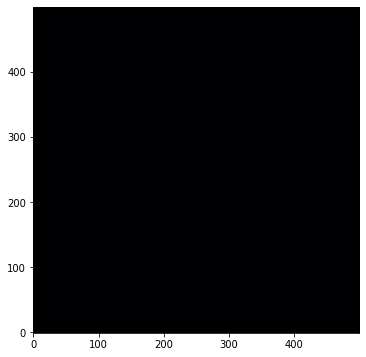

In [16]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/sample18.fits")

cube = cube.with_spectral_unit(u.km/u.s,
                                       velocity_convention='radio',
                                       rest_value=25.715141*u.GHz)

x, y = 3227, 5226
size = 250

moment_1 = cube.moment(order=2)

moment_1_cutout = moment_1[y - size:y + size, x - size:x + size]
plt.figure(figsize=(18, 6))
plt.imshow(moment_1_cutout.value, origin='lower', cmap='inferno')

print(np.nanmax(moment_1_cutout))

/home/dealderod/.local/lib/python3.8/site-packages/radio_beam/multiple_beams.py:261: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"
/home/dealderod/.local/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  return super().imshow(X, *args, origin=origin, **kwargs)
/home/dealderod/.local/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  return super().imshow(X, *args, origin=origin, **kwargs)


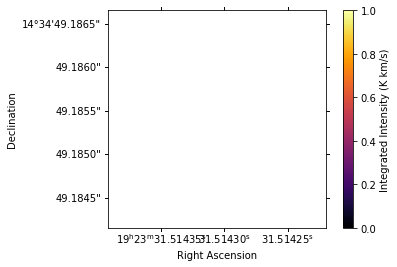

In [34]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_28.image", format='casa_image')
cube.beam_threshold = 0.1

x, y = 3227, 5226
size = 250

masked_moment01 = cube.moment0()

masked_moment0 = masked_moment01[y - size:y + size, x - size:x + size]
ax = plt.subplot(projection=masked_moment0.wcs)
im = ax.imshow(masked_moment0.value, origin='lower', cmap='inferno')
cbar = plt.colorbar(im)
cbar.set_label('Integrated Intensity (K km/s)')

ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')



## June 1, 2021

<bound method BaseSpectralCube.max of SpectralCube with shape=(1, 9600, 9600) and unit=Jy / beam:
 n_x:   9600  type_x: RA---SIN  unit_x: deg    range:   290.916161 deg:  290.917539 deg
 n_y:   9600  type_y: DEC--SIN  unit_y: deg    range:    14.517506 deg:   14.518839 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz> Cube Max)
Jy / beam Unit Flux


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
      10000.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D
The errors are:
 [7.77990335e-03 1.69048728e-07 1.69054895e-07 1.69213642e-07
 1.69139891e-07 1.03474626e+03]
Parameter('amplitude', value=0.5112119114321391, unit=Jy / beam)
Parameter('x_mean', value=290.9170758812762, unit=deg)
Parameter('y_mean', value=14.518231614001696, unit=deg)
Parameter('x_stddev', value=6.245048379468892e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Parameter('y_stddev', value=8.505036321615958e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean      ...        y_

<ipython-input-58-a65720e7184a>:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


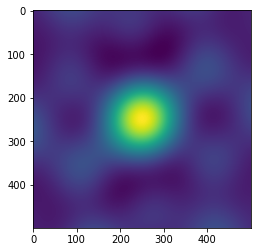

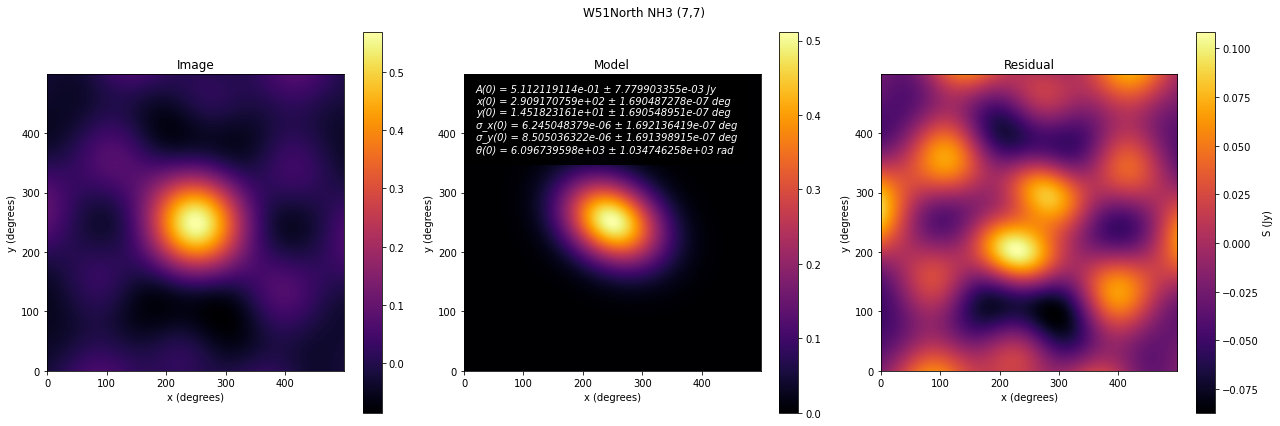

In [58]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/sample18.fits")
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 3227, 5226
size = 250

cube1 = cube[0,:,:]

max_2d_cube = cube.max(axis=0)
cube_cutout = max_2d_cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=10000 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    


# print("\n param_cov")

# print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7)")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(20, 368, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()
plt.show()

<bound method BaseSpectralCube.max of SpectralCube with shape=(1, 9600, 9600) and unit=Jy / beam:
 n_x:   9600  type_x: RA---SIN  unit_x: deg    range:   290.916161 deg:  290.917539 deg
 n_y:   9600  type_y: DEC--SIN  unit_y: deg    range:    14.517506 deg:   14.518839 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz> Cube Max)
Jy / beam Unit Flux


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean            y_mean       x_stddev y_stddev theta
    Jy / beam        deg               deg          arcsec   arcsec       
    --------- ----------------- ------------------ -------- -------- -----
      10000.0 290.9170756769094 14.518231385948818     0.02     0.02   0.0 Printed models.Gaussian2D

 param_cov
{'nfev': 2, 'fvec': array([ 0.01723919,  0.01660841,  0.01595673, ..., -0.00235158,
       -0.00153326, -0.00073291]), 'fjac': array([[-1.08740413e+11,  2.23597791e-18,  2.63901620e-18, ...,
         3.60882120e-18,  3.05971109e-18,  2.59242284e-18],
       [-3.62468044e+10, -1.02521445e+11,  2.00615973e-18, ...,
         2.74314142e-18,  2.35339833e-18,  2.01749971e-18],
       [ 2.73370772e+03, -1.20818346e+00,  8.87861756e+10, ...,
        -7.10021197e-19, -6.01985969e-19, -5.10048865e-19],
       [-9.13494199e-02,  3.63535401e+00, -2.11775904e+00, ...,
        -7.27549

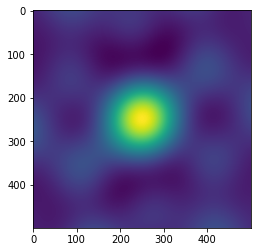

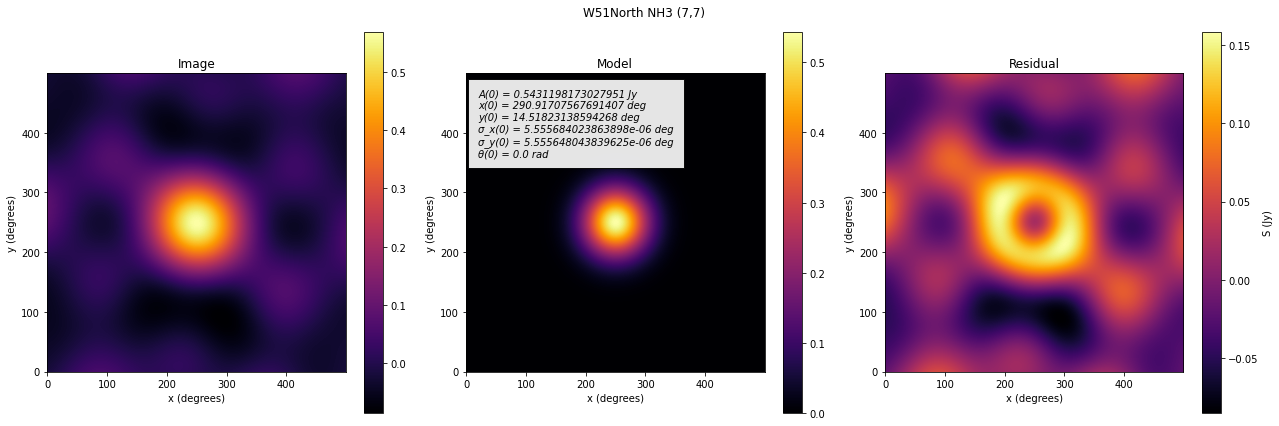

In [23]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/sample18.fits")
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 3227, 5226
size = 250

cube1 = cube[0,:,:]

max_2d_cube = cube.max(axis=0)
cube_cutout = max_2d_cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=10000 * (u.Jy/u.beam),
                                   x_stddev=0.02 * u.arcsec, y_stddev=0.02 * u.arcsec)

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()



# cov = np.diag(fit_p.fit_info['param_cov'])
# errors = np.sqrt(cov)

  

cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

print("\n param_cov")

print(fit_p.fit_info)



print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7)")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.text(20, 360, "A(0) = "+str(p_gauss2D.amplitude[0])+" Jy\n"+"x(0) = "+str(p_gauss2D.x_mean[0])+
        " deg\n"+"y(0) = "+str(p_gauss2D.y_mean[0])+ " deg\n" + "σ_x(0) = "+str(p_gauss2D.x_stddev[0])+
        " deg\n"+"σ_y(0) = "+str(p_gauss2D.y_stddev[0])+" deg\n" +"θ(0) = "+str(p_gauss2D.theta[0])+" rad",
        style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 10},
        horizontalalignment='left')
plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.tight_layout()
plt.show()

## June 3

Averaged standard deviations together

<bound method BaseSpectralCube.max of SpectralCube with shape=(1, 9600, 9600) and unit=Jy / beam:
 n_x:   9600  type_x: RA---SIN  unit_x: deg    range:   290.916161 deg:  290.917539 deg
 n_y:   9600  type_y: DEC--SIN  unit_y: deg    range:    14.517506 deg:   14.518839 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz> Cube Max)
Jy / beam Unit Flux


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
      10000.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D
The errors are:
 [7.77990335e-03 1.69048728e-07 1.69054895e-07 1.69213642e-07
 1.69139891e-07 1.03474626e+03]
Parameter('amplitude', value=0.5112119114321391, unit=Jy / beam)
Parameter('x_mean', value=290.9170758812762, unit=deg)
Parameter('y_mean', value=14.518231614001696, unit=deg)
Parameter('x_stddev', value=7.375042350542425e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Parameter('y_stddev', value=7.375042350542425e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean      ...        y_

<ipython-input-74-9b1216bb22d3>:116: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


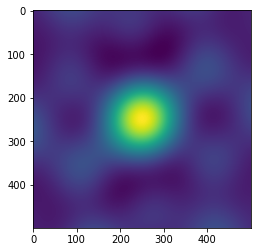

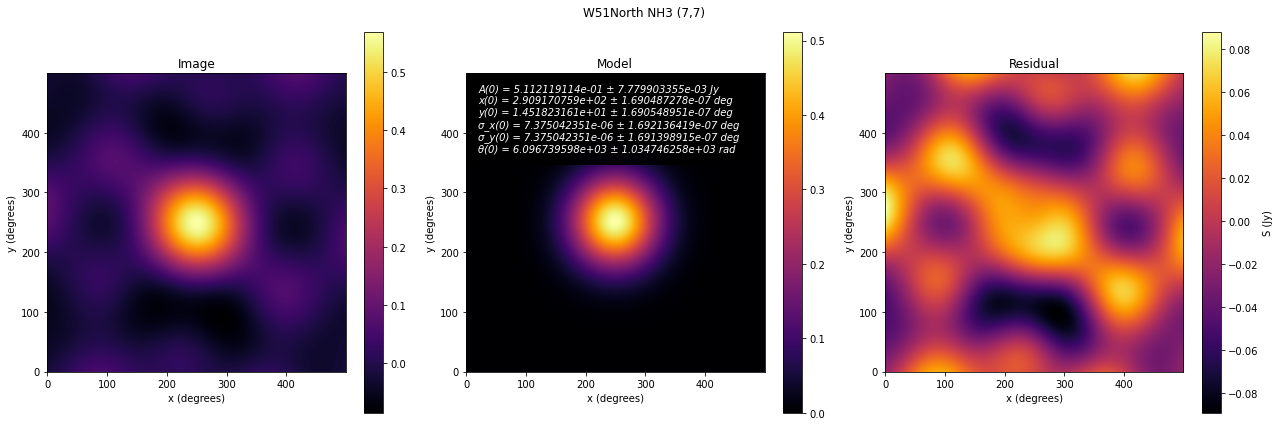

In [74]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/sample18.fits")
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 3227, 5226
size = 250

cube1 = cube[0,:,:]

max_2d_cube = cube.max(axis=0)
cube_cutout = max_2d_cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=10000 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


# print("\n param_cov")

# print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7)")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(20, 368, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()
plt.show()

In [ ]:
fitted_x_stddev = p_gauss2D.x_stddev[0]
fitted_y_stddev = p_gauss2D.y_stddev[0]

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev 
p_gauss2D.y_stddev = p_gauss2D_avg

<bound method BaseSpectralCube.max of SpectralCube with shape=(1, 9600, 9600) and unit=Jy / beam:
 n_x:   9600  type_x: RA---SIN  unit_x: deg    range:   290.916161 deg:  290.917539 deg
 n_y:   9600  type_y: DEC--SIN  unit_y: deg    range:    14.517506 deg:   14.518839 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz> Cube Max)
Jy / beam Unit Flux


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
      10000.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D
The errors are:
 [8.70287370e-03 1.89680409e-07 1.89678428e-07 1.89678428e-07
 1.89680409e-07 1.15560731e+03]
Parameter('amplitude', value=0.5097991710218452, unit=Jy / beam)
Parameter('x_mean', value=290.91707588452516, unit=deg)
Parameter('y_mean', value=14.51823161621888, unit=deg)
Parameter('x_stddev', value=7.398515105679411e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Parameter('y_stddev', value=7.398515105679411e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean       ...       th

<ipython-input-75-0ba544d1e24e>:116: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


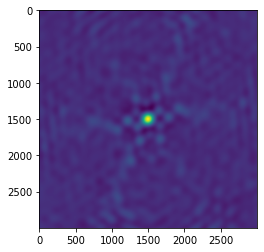

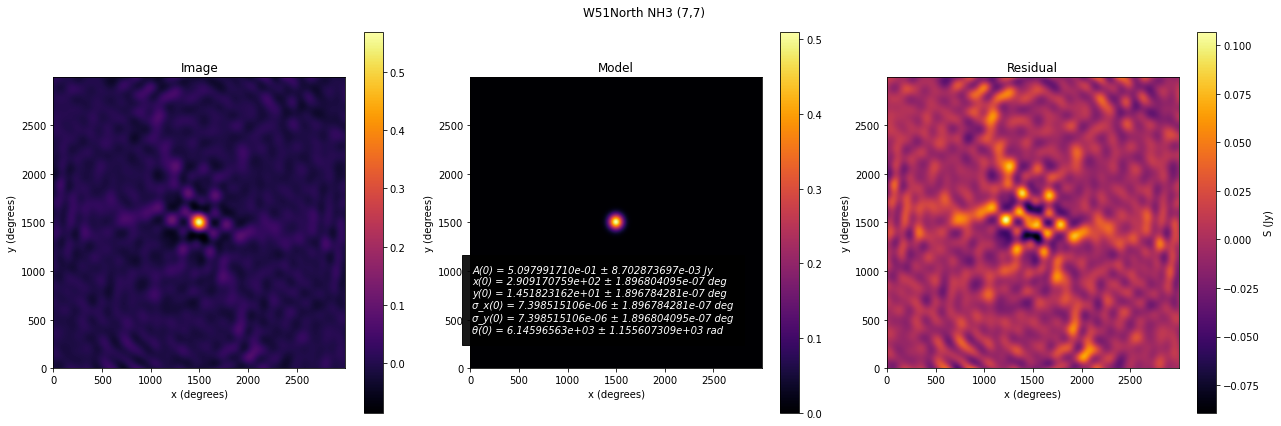

In [75]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/sample18.fits")
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 3227, 5226
size = 1500

cube1 = cube[0,:,:]

max_2d_cube = cube.max(axis=0)
cube_cutout = max_2d_cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=10000 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


# print("\n param_cov")

# print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7)")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(20, 368, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()
plt.show()

<ipython-input-2-2e54b376ab2b>:116: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


<bound method BaseSpectralCube.max of SpectralCube with shape=(1, 400, 400) and unit=Jy / beam:
 n_x:    400  type_x: RA---SIN  unit_x: deg    range:   290.916051 deg:  290.917653 deg
 n_y:    400  type_y: DEC--SIN  unit_y: deg    range:    14.517394 deg:   14.518946 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 25711088245.190 Hz:25711088245.190 Hz> Cube Max)
Jy / beam Unit Flux
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
        500.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D
The errors are:
 [2.23814908e-02 4.98053621e-07 4.98039288e-07 4.98039288e-07
 4.98053621e-07 1.10169084e+03]
Parameter('amplitude', value=0.4992767156664869, unit=Jy / beam)
Parameter('x_mean', value=290.91707582841065, unit=de

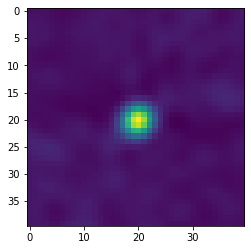

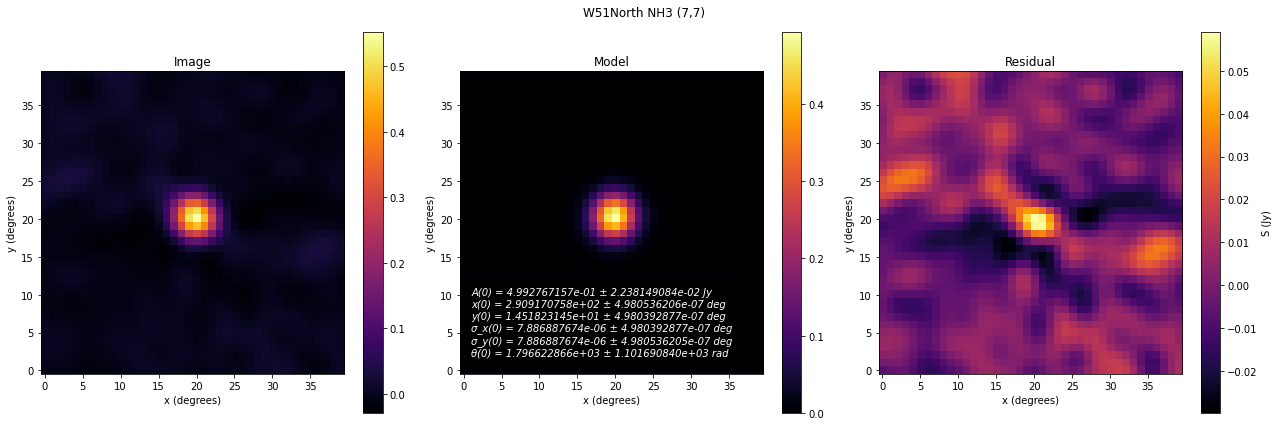

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_28_corrected30_1.fits")
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 144, 215
size = 20

cube1 = cube[0,:,:]

max_2d_cube = cube.max(axis=0)
cube_cutout = max_2d_cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=500 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


# print("\n param_cov")

# print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7)")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()
plt.show()

In [105]:
cube.quicklook()

AttributeError: 'SpectralCube' object has no attribute 'quicklook'

## June 5

<ipython-input-13-886717c0ad78>:129: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


<bound method BaseSpectralCube.max of VaryingResolutionSpectralCube with shape=(100, 400, 400) and unit=Jy / beam:
 n_x:    400  type_x: RA---SIN  unit_x: deg    range:   290.916051 deg:  290.917653 deg
 n_y:    400  type_y: DEC--SIN  unit_y: deg    range:    14.517394 deg:   14.518946 deg
 n_s:    100  type_s: FREQ      unit_s: Hz     range: 22920232700.080 Hz:22921779511.019 Hz> Cube Max)
Jy / beam Unit Flux
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
        500.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D
The errors are:
 [2.55077187e-02 9.59265715e-07 9.52507829e-07 9.50660252e-07
 9.61096749e-07 7.22852325e+00]
Parameter('amplitude', value=0.24253922877212056, unit=Jy / beam)
Parameter('x_mean', value=290.917

Save the gaussian fit (yes or no)? yes


File saved.


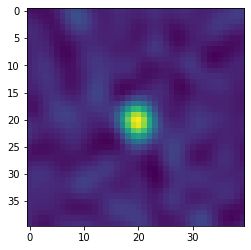

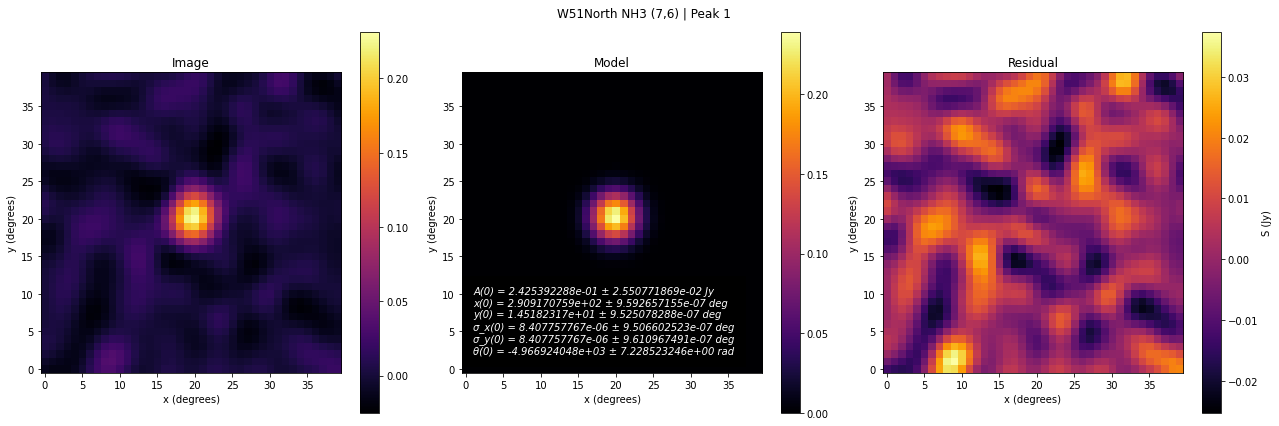

In [13]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Saving methods
field='W51North'
spw=6
directory1 = '/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/gaussianplots/Gaussian2D_plots/'

def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            plt.savefig(directory1+field+'_spw_'+str(spw)+'_GaussianFit2D_V1.0.png')
            print('File saved.')
            
#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_6_corrected11_1.fits")
#cube = cube[,:,:]
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 144, 215
size = 20

cube = cube[50,:,:]
#cube = cube.max(axis=0)
cube_cutout = cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=500 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


# print("\n param_cov")

# print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,6) | Peak 1")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()
saveplotfig_gaussianfit()
plt.show()


<bound method BaseSpectralCube.max of VaryingResolutionSpectralCube with shape=(100, 400, 400) and unit=Jy / beam:
 n_x:    400  type_x: RA---SIN  unit_x: deg    range:   290.916051 deg:  290.917653 deg
 n_y:    400  type_y: DEC--SIN  unit_y: deg    range:    14.517394 deg:   14.518946 deg
 n_s:    100  type_s: FREQ      unit_s: Hz     range: 22920232700.080 Hz:22921779511.019 Hz> Cube Max)
Jy / beam Unit Flux
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
        500.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D
The errors are:
 [3.42260339e-02 1.15493413e-06 1.14755691e-06 1.15874039e-06
 1.14371343e-06 7.61429401e+00]
Parameter('amplitude', value=0.26900316463924234, unit=Jy / beam)
Parameter('x_mean', value=290.917

<ipython-input-14-bdd1a5420090>:129: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


Save the gaussian fit (yes or no)? yes


File saved.


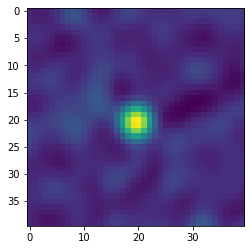

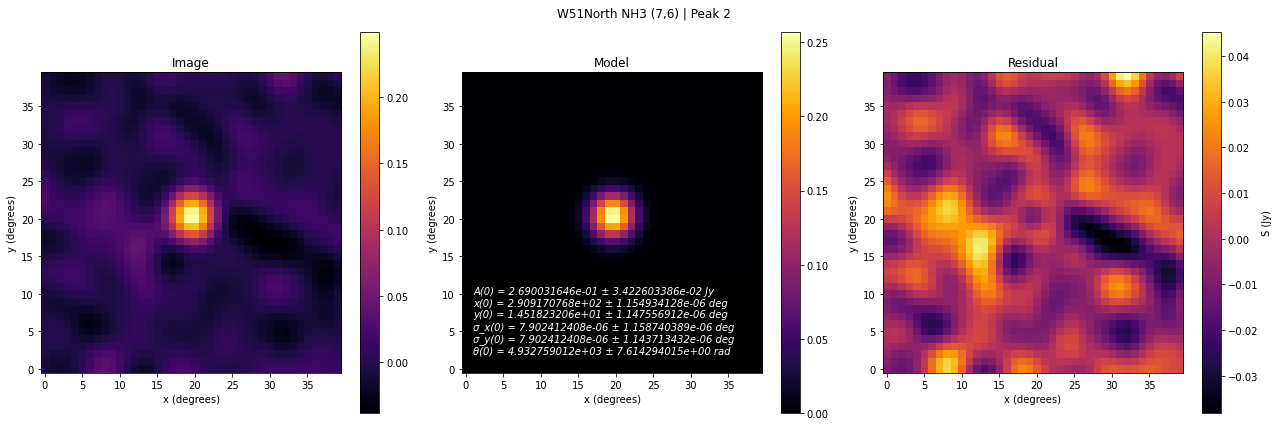

In [14]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

#Saving methods
field='W51North'
spw=6_2
directory1 = '/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/gaussianplots/Gaussian2D_plots/'

def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            plt.savefig(directory1+field+'_spw_'+str(spw)+'_GaussianFit2D_V1.0.png')
            print('File saved.')
            
#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_6_corrected11_1.fits")
#cube = cube[,:,:]
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 144, 215
size = 20

cube = cube[59,:,:]
#cube = cube.max(axis=0)
cube_cutout = cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=500 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


# print("\n param_cov")

# print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,6) | Peak 2")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()
saveplotfig_gaussianfit()
plt.show()


<ipython-input-35-064e02b48760>:130: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


<bound method BaseSpectralCube.max of VaryingResolutionSpectralCube with shape=(100, 400, 400) and unit=Jy / beam:
 n_x:    400  type_x: RA---SIN  unit_x: deg    range:   290.916051 deg:  290.917653 deg
 n_y:    400  type_y: DEC--SIN  unit_y: deg    range:    14.517394 deg:   14.518946 deg
 n_s:    100  type_s: FREQ      unit_s: Hz     range: 22920232700.080 Hz:22921779511.019 Hz> Cube Max)
Jy / beam Unit Flux
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
       1000.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D

 param_cov
{'nfev': 4, 'fvec': array([ 0.00272367,  0.004187  ,  0.00552254, ..., -0.01413285,
       -0.0082353 , -0.00190763]), 'fjac': array([[-1.40082513e+05,  3.81384417e-31,  1.35429102e-29, ...,
      

KeyboardInterrupt: Interrupted by user

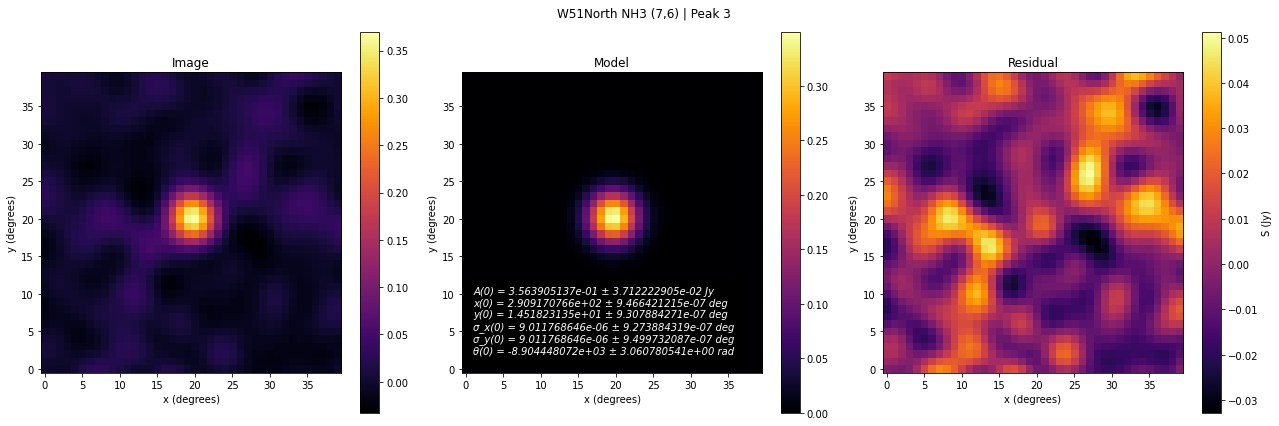

In [35]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

import pylab as pl

#Saving methods
field='W51North'
spw=6_3
directory1 = '/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/gaussianplots/Gaussian2D_plots/'

def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            pl.savefig(directory1+field+'_spw_'+str(spw)+'_GaussianFit2D_V1.0.png')
            print('File saved.')
            
#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_6_corrected11_1.fits")
#cube = cube[,:,:]
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 144, 215
size = 20

cube = cube[68,:,:]
#cube = cube.max(axis=0)
cube_cutout = cube[y - size:y + size, x - size:x + size]

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=1000 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


print("\n param_cov")

print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,6) | Peak 3")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()

saveplotfig_gaussianfit()


plt.show()


## SPW 8

<bound method DaskSpectralCubeMixin.max of DaskVaryingResolutionSpectralCube with shape=(200, 800, 800) and unit=Jy / beam and chunk size (10, 50, 50):
 n_x:    800  type_x: RA---SIN  unit_x: deg    range:   290.915247 deg:  290.918457 deg
 n_y:    800  type_y: DEC--SIN  unit_y: deg    range:    14.516617 deg:   14.519724 deg
 n_s:    200  type_s: FREQ      unit_s: Hz     range: 23651865317.468 Hz:23654974563.698 Hz> Cube Max)
Jy / beam Unit Flux
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude    x_mean      y_mean   x_stddev y_stddev       theta       
    Jy / beam     deg         deg      arcsec   arcsec                    
    --------- ----------- ----------- -------- -------- ------------------
          0.2 290.9156406 14.51821439    0.036    0.036 1.5707963267948966 Printed models.Gaussian2D

 param_cov
{'nfev': 31, 'fvec': array([ 0.01271279,  0.0090804 ,  0.00467581, ..., -0.00347734,
       -0.00018293,  0.002189  ]), 'fjac': 

ValueError: Input must be 1- or 2-d.

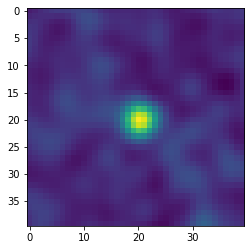

In [64]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

import pylab as pl

#Saving methods
field='W51North'
spw=8
directory1 = '/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/gaussianplots/Gaussian2D_plots/'

def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            pl.savefig(directory1+field+'_spw_'+str(spw)+'_GaussianFit2D_V1.0.png')
            print('File saved.')
            
#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_8_corrected13_1.image", format='casa_image')
#cube = cube[,:,:]
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5

# maser_channel = 579

x, y = 637, 358
size = 20

cube = cube[84,:,:]
cube.quicklook()
#cube = cube.max(axis=0)
cube_cutout = cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()
p_init_gauss2D = models.Gaussian2D(x_mean=290.9156406 * u.deg, y_mean=14.51821439 * u.deg, amplitude=2e-1 * (u.Jy/u.beam),
                                   x_stddev=.036* u.arcsec, y_stddev=.036* u.arcsec, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


print("\n param_cov")

print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,6) | Peak 3")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()

saveplotfig_gaussianfit()


plt.show()



## SPW 28

<bound method DaskSpectralCubeMixin.max of DaskVaryingResolutionSpectralCube with shape=(100, 400, 400) and unit=Jy / beam and chunk size (10, 50, 50):
 n_x:    400  type_x: RA---SIN  unit_x: deg    range:   290.916051 deg:  290.917653 deg
 n_y:    400  type_y: DEC--SIN  unit_y: deg    range:    14.517394 deg:   14.518946 deg
 n_s:    100  type_s: FREQ      unit_s: Hz     range: 25710166408.363 Hz:25711713219.301 Hz> Cube Max)
Jy / beam Unit Flux
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
        500.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D
The errors are:
 [9.50249715e-03 2.50266680e-06 2.50260565e-06 2.50260565e-06
 2.50266680e-06 6.51855786e+03]
Parameter('amplitude', value=0.04218933573340682, unit=Jy / be

<ipython-input-9-d4936f0c4927>:132: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


Save the gaussian fit (yes or no)? yes


File saved.


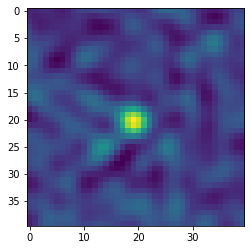

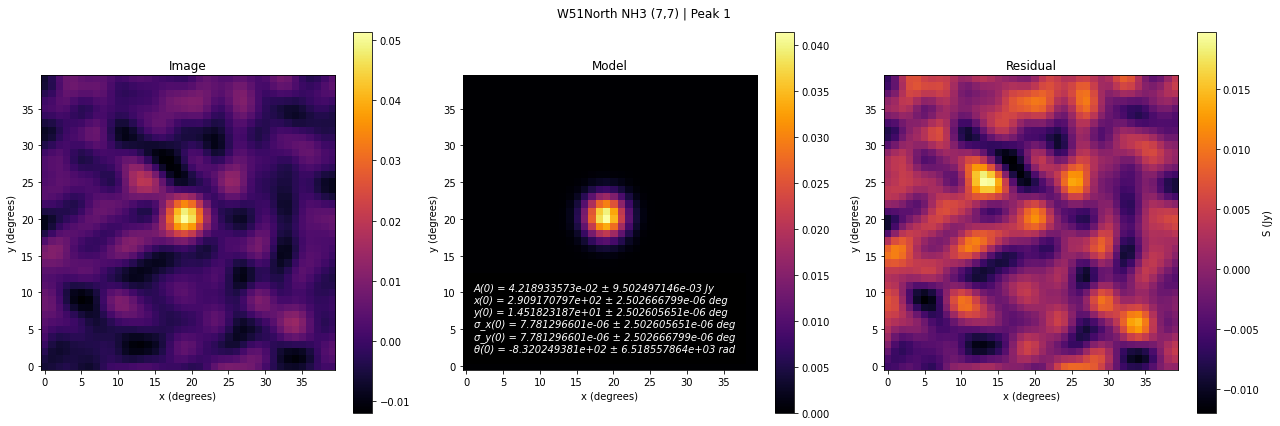

In [9]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

import pylab as pl

#Saving methods
field='W51North'
spw="28_1"
directory1 = '/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/gaussianplots/Gaussian2D_plots/'

def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            pl.savefig(directory1+field+'_spw_'+str(spw)+'_GaussianFit2D_V1.0.png')
            print('File saved.')
            
#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_28_corrected31.image", format='casa_image')
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5


# maser_channel = 579

x, y = 144, 215
size = 20

cube = cube[48,:,:]

#max_2d_cube = cube.max(axis=0)
cube_cutout = cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=500 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


# print("\n param_cov")

# print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7) | Peak 1")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()
saveplotfig_gaussianfit()

plt.show()

<bound method DaskSpectralCubeMixin.max of DaskVaryingResolutionSpectralCube with shape=(100, 400, 400) and unit=Jy / beam and chunk size (10, 50, 50):
 n_x:    400  type_x: RA---SIN  unit_x: deg    range:   290.916051 deg:  290.917653 deg
 n_y:    400  type_y: DEC--SIN  unit_y: deg    range:    14.517394 deg:   14.518946 deg
 n_s:    100  type_s: FREQ      unit_s: Hz     range: 25710166408.363 Hz:25711713219.301 Hz> Cube Max)
Jy / beam Unit Flux


<ipython-input-4-f7de310504b1>:132: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
        500.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D
The errors are:
 [1.19501322e-02 3.29778211e-06 3.29762273e-06 3.29762273e-06
 3.29778211e-06 4.34236845e+03]
Parameter('amplitude', value=0.04026483350660578, unit=Jy / beam)
Parameter('x_mean', value=290.91708114251827, unit=deg)
Parameter('y_mean', value=14.518230566174775, unit=deg)
Parameter('x_stddev', value=8.606517323485645e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Parameter('y_stddev', value=8.606517323485645e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude            x_mean       ...      

Save the gaussian fit (yes or no)? yes


File saved.


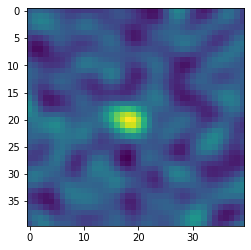

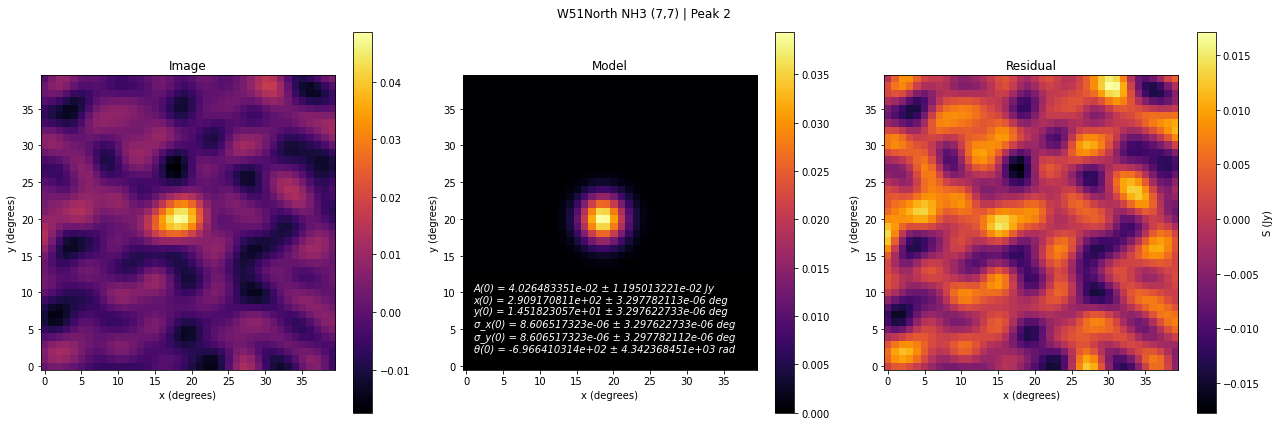

In [4]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

import pylab as pl

#Saving methods
field='W51North'
spw="28_2"
directory1 = '/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/gaussianplots/Gaussian2D_plots/'

def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            pl.savefig(directory1+field+'_spw_'+str(spw)+'_GaussianFit2D_V1.0.png')
            print('File saved.')
            
#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_28_corrected31.image", format='casa_image')
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5


# maser_channel = 579

x, y = 144, 215
size = 20

cube = cube[53,:,:]

#max_2d_cube = cube.max(axis=0)
cube_cutout = cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=500 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


# print("\n param_cov")

# print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7) | Peak 2")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()
saveplotfig_gaussianfit()

plt.show()

<bound method DaskSpectralCubeMixin.max of DaskVaryingResolutionSpectralCube with shape=(100, 400, 400) and unit=Jy / beam and chunk size (10, 50, 50):
 n_x:    400  type_x: RA---SIN  unit_x: deg    range:   290.916051 deg:  290.917653 deg
 n_y:    400  type_y: DEC--SIN  unit_y: deg    range:    14.517394 deg:   14.518946 deg
 n_s:    100  type_s: FREQ      unit_s: Hz     range: 25710166408.363 Hz:25711713219.301 Hz> Cube Max)
Jy / beam Unit Flux
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
        500.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D
The errors are:
 [2.24788398e-02 4.80388061e-07 4.80362551e-07 4.80362551e-07
 4.80388061e-07 5.75849536e+02]
Parameter('amplitude', value=0.5198893549022252, unit=Jy / bea

<ipython-input-8-cc266986a63d>:132: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


Save the gaussian fit (yes or no)? yes


File saved.


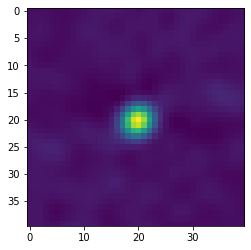

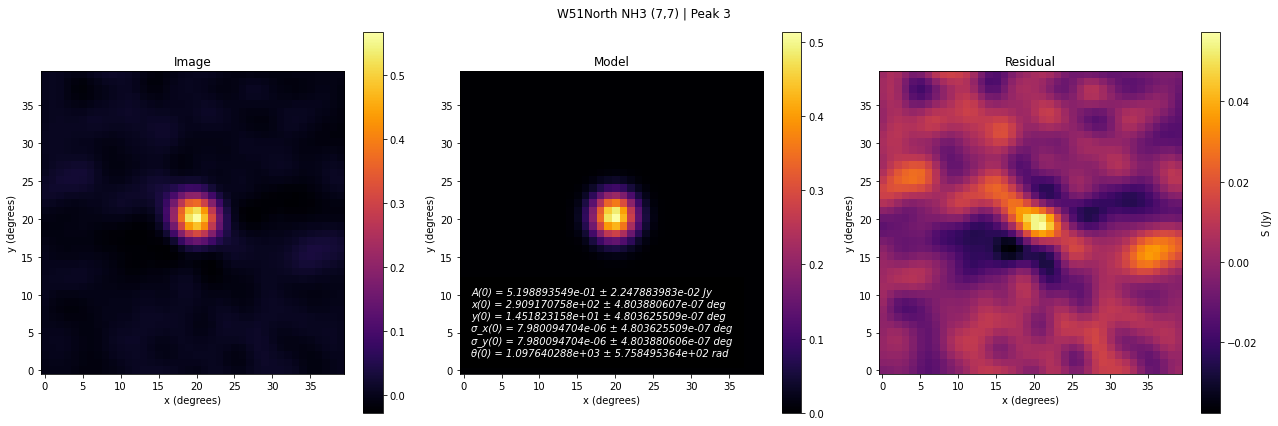

In [8]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

import pylab as pl

#Saving methods
field='W51North'
spw="28_3"
directory1 = '/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/gaussianplots/Gaussian2D_plots/'

def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            pl.savefig(directory1+field+'_spw_'+str(spw)+'_GaussianFit2D_V1.0.png')
            print('File saved.')
            
#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_28_corrected31.image", format='casa_image')
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5


# maser_channel = 579

x, y = 144, 215
size = 20

cube = cube[59,:,:]

#max_2d_cube = cube.max(axis=0)
cube_cutout = cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=500 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


# print("\n param_cov")

# print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7) | Peak 3")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()
saveplotfig_gaussianfit()

plt.show()

<bound method DaskSpectralCubeMixin.max of DaskVaryingResolutionSpectralCube with shape=(100, 400, 400) and unit=Jy / beam and chunk size (10, 50, 50):
 n_x:    400  type_x: RA---SIN  unit_x: deg    range:   290.916051 deg:  290.917653 deg
 n_y:    400  type_y: DEC--SIN  unit_y: deg    range:    14.517394 deg:   14.518946 deg
 n_s:    100  type_s: FREQ      unit_s: Hz     range: 25710166408.363 Hz:25711713219.301 Hz> Cube Max)
Jy / beam Unit Flux


<ipython-input-7-bade57f2c246>:132: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 3, 2)


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude       x_mean      ...   y_stddev        theta       
    Jy / beam        deg        ...     deg                       
    --------- ----------------- ... ----------- ------------------
        500.0 290.9170756769094 ... 1.11111e-05 1.5707963267948966 Printed models.Gaussian2D
The errors are:
 [1.34440679e-02 7.25775081e-07 7.25735551e-07 7.25735551e-07
 7.25775081e-07 8.48082131e+02]
Parameter('amplitude', value=0.2058187079978814, unit=Jy / beam)
Parameter('x_mean', value=290.91707596149945, unit=deg)
Parameter('y_mean', value=14.518231599997083, unit=deg)
Parameter('x_stddev', value=7.862334378474588e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Parameter('y_stddev', value=7.862334378474588e-06, unit=deg, bounds=(1.1754943508222875e-38, None))
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean       ...       t

Save the gaussian fit (yes or no)? yes


File saved.


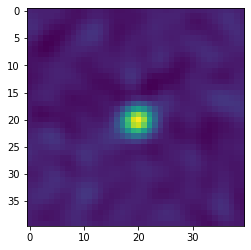

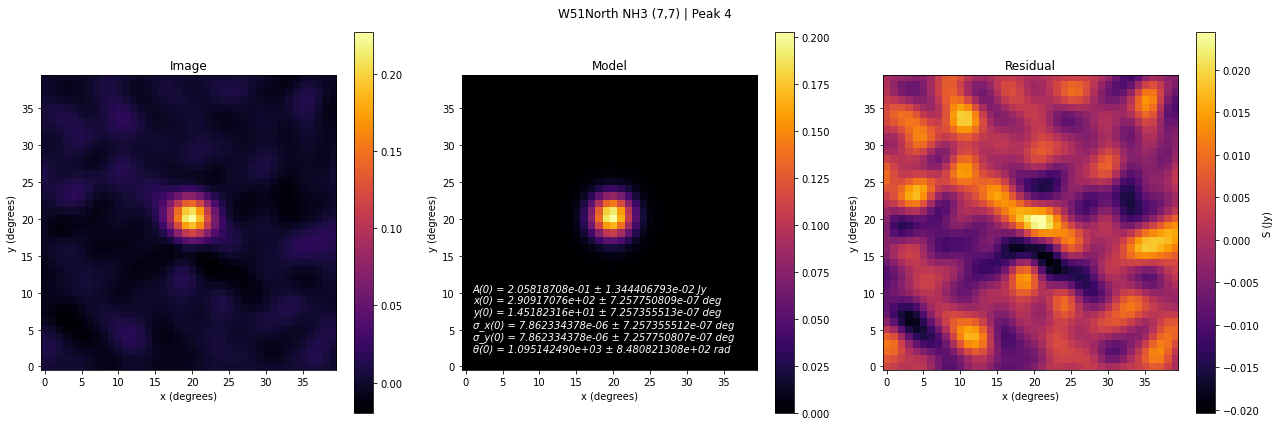

In [7]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

import pylab as pl

#Saving methods
field='W51North'
spw="28_4"
directory1 = '/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/gaussianplots/Gaussian2D_plots/'

def saveplotfig_gaussianfit():
    answer = None 
    while answer not in ("yes", "no"): 
        answer = input("Save the gaussian fit (yes or no)?") 
        if answer == "yes": 
            pl.savefig(directory1+field+'_spw_'+str(spw)+'_GaussianFit2D_V1.0.png')
            print('File saved.')
            
#Accessing Cube Data
cube = SpectralCube.read("/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_28_corrected31.image", format='casa_image')
print(cube.max,"Cube Max)")
print(cube.unit,"Unit Flux")
cube.beam_threshold = 0.5


# maser_channel = 579

x, y = 144, 215
size = 20

cube = cube[69,:,:]

#max_2d_cube = cube.max(axis=0)
cube_cutout = cube[y - size:y + size, x - size:x + size]
cube_cutout.quicklook()

p_init_gauss2D = models.Gaussian2D(x_mean=290.9170756769094 * u.deg, y_mean=14.518231385948818 * u.deg, amplitude=500 * (u.Jy/u.beam),
                                   x_stddev=1.11111e-5 * u.degree, y_stddev=1.11111e-5 * u.degree, theta=(np.pi/2))

print(p_init_gauss2D,"Printed models.Gaussian2D")

yy, xx = cube_cutout.spatial_coordinate_map

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout
cube_cutout_quant[np.isnan(cube_cutout_quant)] = 0.0

#p_init_gauss2D.theta.fixed = True

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
# p_gauss2D_avg = (p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0])
# p_gauss2D.x_stddev[0], p_gauss2D.y_stddev[0] = p_gauss2D_avg

fitted_x_stddev = p_gauss2D.x_stddev
fitted_y_stddev = p_gauss2D.y_stddev

p_gauss2D_avg = (fitted_x_stddev + fitted_y_stddev)/2
p_gauss2D.x_stddev = p_gauss2D_avg
p_gauss2D.y_stddev = p_gauss2D_avg


# print("\n param_cov")

# print(fit_p.fit_info)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

print("The errors are:\n", errors)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)





print(p_gauss2D.amplitude)
print(p_gauss2D.x_mean)
print(p_gauss2D.y_mean)
print(p_gauss2D.x_stddev)
print(p_gauss2D.y_stddev)

print(p_gauss2D)
              
plt.figure(figsize=(18, 6))
plt.suptitle("W51North NH3 (7,7) | Peak 4")
plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")
plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')
plt.xlabel("x (degrees)")
plt.ylabel("y (degrees)")

plt.subplot(1, 3, 2)
plt.text(1, 2, "A(0) = "+str(amplitude)+" ± "+str(amplitude_error)+" Jy\n"+"x(0) = "+str(x_mean)+" ± "+str(x_mean_error)+
        " deg\n"+"y(0) = "+str(y_mean)+" ± "+str(y_mean_error)+ " deg\n" + "σ_x(0) = "+str(x_stddev)+" ± "+str(x_stddev_error)+
        " deg\n"+"σ_y(0) = "+str(y_stddev)+" ± "+str(y_stddev_error)+" deg\n" +"θ(0) = "+str(theta)+" ± "+str(theta_error)+" rad",
        style='italic',
        bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10}, color="white",
        horizontalalignment='left')

plt.tight_layout()
saveplotfig_gaussianfit()

plt.show()

## June 7

In [ ]:
import sys
import numpy as np
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook
from spectral_cube import SpectralCube
import pylab as pl

fn = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging
/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
img = SpectralCube.read(fn, format='casa_image')
cen = img.shape[1]/2, img.shape[2]/2
fig = pl.figure(figsize=(10,10))
fig, ax = quicklook(img[:,cen[0]-150:cen[0]+250, cen[1]-400:cen[1]+200], fig=fig, inner_stretch='linear')